<a href="https://colab.research.google.com/github/davidofitaly/06_reduction_dimensions_projects/blob/main/02_tsne_fashion_mnist_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data loading](#1)
3. [Visualization of data](#2)
4. [Normalization](#3)
5. [PCA - 2 components](#4)
6. [PCA - 3 components](#5)
7. [PCA - 0.95](#6)
8. [Comparison of the percentage of explained variance](#7)

### <a name='0'> </a> Import of libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')

Pandas: 2.2.2
Numpy: 1.26.4


### <a name='1'> </a> Data loading

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


### <a name='2'> </a> Visualization of data

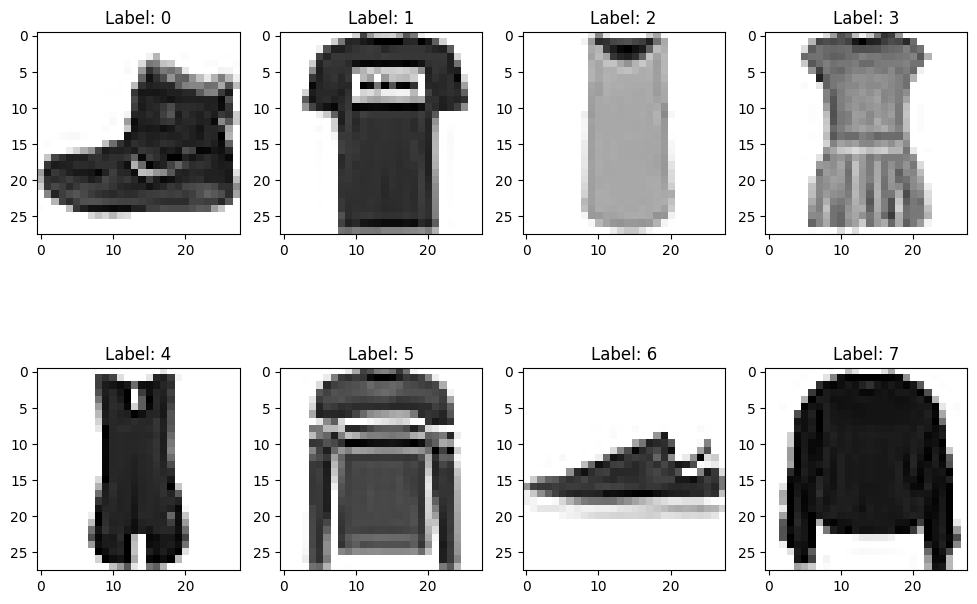

In [6]:
plt.figure(figsize=(12,8))

for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {i}')
plt.show()

### <a name='3'> </a> Normalization

In [8]:
X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.
X_test = X_test.reshape(-1, 28 * 28).astype('float') / 255.

X_train.shape

(60000, 784)

### <a name='4'> </a> PCA - 2 components

In [9]:
# Applying PCA to reduce the dimensionality of the standardized data to 2 principal components
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)

X_train_pca_2.shape

(60000, 2)

In [10]:
# Creating a DataFrame to hold the PCA results and the corresponding class labels
df_pca_2 = pd.DataFrame(data={'pca_1': X_train_pca_2[:, 0], 'pca_2': X_train_pca_2[:,1], 'class': y_train})
df_pca_2[:10]

pca_1     pca_2  class
0 -0.001908  0.025114      9
1  0.021652 -0.006945      0
2 -0.011163 -0.016945      0
3  0.000484 -0.015087      3
4  0.012366 -0.018473      0
5  0.018109  0.007758      2
6 -0.022969  0.005268      7
7  0.028112  0.025779      2
8 -0.024344 -0.005932      5
9 -0.014543  0.006391      5

In [12]:
# Creating a DataFrame to store the explained variance ratios and cumulative explained variance of the PCA components
results_pca_2 = pd.DataFrame(data={'explained_variance_ratio': pca_2.explained_variance_ratio_})
results_pca_2['cumulative'] = results_pca_2['explained_variance_ratio'].cumsum()
results_pca_2['component'] = results_pca_2.index + 1

results_pca_2

explained_variance_ratio  cumulative  component
0                  0.290389    0.290389          1
1                  0.177557    0.467946          2

In [13]:
# Creating a figure to visualize the explained variance ratio and cumulative explained variance of PCA components
fig = go.Figure(data=[go.Bar(x=results_pca_2['component'], y=results_pca_2['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results_pca_2['component'], y=results_pca_2['cumulative'], name='cumulative')],
                      layout=go.Layout(title='PCA - 2 components', width=1000, template='ggplot2'))

fig.show()

In [14]:
px.scatter(df_pca_2, 'pca_1', 'pca_2', color=df_pca_2['class'], width=1000)

### <a name='5'> </a> PCA - 3 components

In [20]:
# Applying PCA to reduce the dimensionality of the standardized data to 3 principal components
from sklearn.decomposition import PCA

pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train)

X_train_pca_3.shape

(60000, 3)

In [21]:
# Creating a DataFrame to hold the PCA results and the corresponding class labels
df_pca_3 = pd.DataFrame(data={'pca_1': X_train_pca_3[:, 0], 'pca_2': X_train_pca_3[:,1], 'pca_3': X_train_pca_3[:,2],'class': y_train})
df_pca_3[:10]

pca_1     pca_2     pca_3  class
0 -0.001908  0.025114 -0.018626      9
1  0.021652 -0.006945 -0.004017      0
2 -0.011163 -0.016945  0.001632      0
3  0.000484 -0.015087  0.003113      3
4  0.012366 -0.018473 -0.011445      0
5  0.018109  0.007758  0.009492      2
6 -0.022969  0.005268  0.002274      7
7  0.028112  0.025779  0.005182      2
8 -0.024344 -0.005932  0.001612      5
9 -0.014543  0.006391 -0.001069      5

In [27]:
# Creating a DataFrame to store the explained variance ratios and cumulative explained variance of the PCA components
results_pca_3 = pd.DataFrame(data={'explained_variance_ratio': pca_3.explained_variance_ratio_})
results_pca_3['cumulative'] = results_pca_3['explained_variance_ratio'].cumsum()
results_pca_3['component'] = results_pca_3.index + 1

results_pca_3

explained_variance_ratio  cumulative  component
0                  0.290389    0.290389          1
1                  0.177557    0.467946          2
2                  0.060188    0.528134          3

In [28]:
# Creating a figure to visualize the explained variance ratio and cumulative explained variance of PCA components
fig = go.Figure(data=[go.Bar(x=results_pca_3['component'], y=results_pca_3['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results_pca_3['component'], y=results_pca_3['cumulative'], name='cumulative')],
                      layout=go.Layout(title='PCA - 2 components', width=1000, template='ggplot2'))

fig.show()

In [25]:
px.scatter_3d(df_pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', opacity=0.8, size_max=8, width=1000)

### <a name='6'> </a> PCA - 0.95

In [29]:
# Perform PCA to reduce dimensionality while retaining 95% of the variance in the data.
from sklearn.decomposition import PCA

pca_95 = PCA(n_components=0.95)
X_train_pca_95 = pca_95.fit_transform(X_train)

X_train_pca_95.shape

(60000, 187)

In [31]:
# Creating a DataFrame to store the explained variance ratios and cumulative explained variance of the PCA components
results_pca_95 = pd.DataFrame(data={'explained_variance_ratio': pca_95.explained_variance_ratio_})
results_pca_95['cumulative'] = results_pca_95['explained_variance_ratio'].cumsum()
results_pca_95['component'] = results_pca_95.index + 1

results_pca_95

explained_variance_ratio  cumulative  component
0                    0.290389    0.290389          1
1                    0.177557    0.467946          2
2                    0.060188    0.528134          3
3                    0.049571    0.577705          4
4                    0.038477    0.616182          5
..                        ...         ...        ...
182                  0.000304    0.948810        183
183                  0.000302    0.949112        184
184                  0.000299    0.949411        185
185                  0.000297    0.949708        186
186                  0.000295    0.950003        187

[187 rows x 3 columns]

In [32]:
# Creating a figure to visualize the explained variance ratio and cumulative explained variance of PCA components
fig = go.Figure(data=[go.Bar(x=results_pca_95['component'], y=results_pca_95['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results_pca_95['component'], y=results_pca_95['cumulative'], name='cumulative')],
                      layout=go.Layout(title='PCA - 2 components', width=1000, template='ggplot2'))

fig.show()

### <a name='7'> </a> Comparison of the percentage of explained variance